## Imports

In [71]:
import pandas as pd
import numpy as np
import xarray as xr

import os
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

## Add PyalData folder to the path to import all modules

In [72]:
import sys
sys.path.append("c:\\Users\\nerea\\OneDrive\\Documentos\\EPFL_MASTER\\PDM\\Project\\PyalData")
# to change for the actual path where PyalData has been cloned

In [73]:
from pyaldata import *

## Load the data

In [74]:
data_dir = "C:/Users/nerea/OneDrive/Documentos/EPFL_MASTER/PDM/Project/Code/Data"
fname = os.path.join(data_dir, "Sansa_20180507.mat")

In [75]:
# load TrialData .mat file into a DataFrame
group_df = mat2dataframe(fname, shift_idx_fields=True, td_name='grp')


array field StimParamNames could not be converted to int.


c:\Users\nerea\OneDrive\Documentos\EPFL_MASTER\PDM\Project\PyalData\pyaldata\data_cleaning.py:68: RuntimeWarning:

invalid value encountered in cast



In [76]:
trial_df = mat2dataframe_NC(fname, shift_idx_fields=True, td_name = 'trial_data')

array field kin_names could not be converted to int.
array field joint_names could not be converted to int.
array field stim_param_names could not be converted to int.
field idx_sent_pull could not be converted to int.
field idx_bad could not be converted to int.
field idx_decode_reach could not be converted to int.
field idx_sent_reach could not be converted to int.


In [77]:
trial_df.head(5)

,kin_names,joint_names,bin_size,type,tonic_stim_params,reach_stim_params,pull_stim_params,stim_param_names,file_quality,idx_spike_init,...,idx_sent_reach,x,y,z,angles,pressure,M1_spikes,M1_unit_guide,PMd_spikes,PMd_unit_guide
0,"[Shoulder, Elbow Proximal, Elbow Medial, Elbow...","[Shoulder, Elbow, Wrist]",0.01,BASELINE,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[PIN, AMP, PW, FREQ, Length]",0,448,...,-1,"[[-78.177001953125, -67.13090515136719, -94.55...","[[157.4872283935547, 127.37480926513672, 138.9...","[[239.44883728027344, 213.4141082763672, 217.8...","[[131.15547210086754, 63.10203357675376, 129.9...","[-1.1121927073683655, -1.110490070758832, -1.1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[33, 0], [34, 0], [35, 0], [36, 0], [37, 0], ..."
1,"[Shoulder, Elbow Proximal, Elbow Medial, Elbow...","[Shoulder, Elbow, Wrist]",0.01,BASELINE,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[PIN, AMP, PW, FREQ, Length]",1,507,...,-1,"[[-72.200439453125, -67.20014190673828, -94.15...","[[143.6313018798828, 129.1309356689453, 139.59...","[[230.2220001220703, 208.25875854492188, 214.5...","[[125.03894719557405, 91.08175893596952, 132.5...","[-1.0840457012961406, -1.1102463251656425, -1....","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,...","[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[33, 0], [34, 0], [35, 0], [36, 0], [37, 0], ..."
2,"[Shoulder, Elbow Proximal, Elbow Medial, Elbow...","[Shoulder, Elbow, Wrist]",0.01,BC-PULL,"[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[1.0, 900.0, 0.3, 50.0, 600.0]","[PIN, AMP, PW, FREQ, Length]",0,557,...,702,"[[-75.16343688964844, -66.7153549194336, -93.4...","[[165.39056396484375, 127.61315155029297, 137....","[[242.6690673828125, 209.51853942871094, 215.1...","[[129.7355586993369, 54.733106333416096, 120.8...","[-1.1151632783516197, -1.1158892630580866, -1....","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[33, 0], [34, 0], [35, 0], [36, 0], [37, 0], ..."
3,"[Shoulder, Elbow Proximal, Elbow Medial, Elbow...","[Shoulder, Elbow, Wrist]",0.01,BC-PULL,"[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[1.0, 1100.0, 0.3, 50.0, 600.0]","[PIN, AMP, PW, FREQ, Length]",0,442,...,587,"[[-71.64566040039062, -76.5112075805664, -102....","[[156.47683715820312, 120.10973358154297, 132....","[[246.95883178710938, 209.92193603515625, 216....","[[127.93018399305606, 66.22844603540095, 128.2...","[-1.115026256537128, -1.1111063005844346, -1.1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[33, 0], [34, 0], [35, 0], [36, 0], [37, 0], ..."
4,"[Shoulder, Elbow Proximal, Elbow Medial, Elbow...","[Shoulder, Elbow, Wrist]",0.01,BC-PULL,"[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[1.0, 1200.0, 0.3, 50.0, 600.0]","[PIN, AMP, PW, FREQ, Length]",0,880,...,"[1028, 5775]","[[-69.59890747070312, -66.78845977783203, -94....","[[158.05697631835938, 125.64141082763672, 136....","[[244.5120849609375, 211.5255584716797, 215.55...","[[131.20528804996624, 67.28458944969452, 125.5...","[-1.1284637944120761, -1.1026186975687575, -1....","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0...","[[0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0,...","[[33, 0], [34, 0], [35, 0], [36, 0], [37, 0], ..."


In [78]:
group_df.head(5)

,num,Quality,type,Tonic,Baseline,BCReach,BCPull,BCReachPull,TonicStimParams,ReachStimParams,PullStimParams,KUKAPos,ViconFileName,BlackrockFileName,TDTFileName,StimParamNames
0,4,0,BASELINE,0,1,0,0,0,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[3, 1, 2, 3, 1, 2]",20180507_KRG_BrainDecoding-04.mat,20180507_KRG_BrainDecoding004.nev,Sansa_20180507-4.mat,"[PIN, AMP, PW, FREQ, Length]"
1,5,1,BASELINE,0,1,0,0,0,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[2, 3, 1, 2, 3]",20180507_KRG_BrainDecoding-05.mat,20180507_KRG_BrainDecoding005.nev,Sansa_20180507-5.mat,"[PIN, AMP, PW, FREQ, Length]"
2,6,0,BC-PULL,0,0,0,1,0,"[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[1.0, 900.0, 0.3, 50.0, 600.0]","[1, 2, 2, 3, 1, 2]",20180507_KRG_BrainDecoding-06.mat,20180507_KRG_BrainDecoding006.nev,Sansa_20180507-6.mat,"[PIN, AMP, PW, FREQ, Length]"
3,7,0,BC-PULL,0,0,0,1,0,"[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[1.0, 1100.0, 0.3, 50.0, 600.0]","[3, 1, 2, 3, 1]",20180507_KRG_BrainDecoding-07.mat,20180507_KRG_BrainDecoding007.nev,Sansa_20180507-7.mat,"[PIN, AMP, PW, FREQ, Length]"
4,8,0,BC-PULL,0,0,0,1,0,"[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[1.0, 1200.0, 0.3, 50.0, 600.0]","[2, 3, 1, 2, 3, 1]",20180507_KRG_BrainDecoding-08.mat,20180507_KRG_BrainDecoding008.nev,Sansa_20180507-8.mat,"[PIN, AMP, PW, FREQ, Length]"


In [79]:
trial_df.iloc[:,16].head(10)
#the values are one unit less than for the matlab because of how we define the first row in both programs
# 1 for matlab and 0 in python

0               -1
1             5170
2    [1423, 10511]
3             5249
4               -1
5               -1
6               -1
7               -1
8               -1
9             2746
Name: idx_bad, dtype: object

In [80]:
trial_df.columns

Index(['kin_names', 'joint_names', 'bin_size', 'type', 'tonic_stim_params',
       'reach_stim_params', 'pull_stim_params', 'stim_param_names',
       'file_quality', 'idx_spike_init', 'idx_kuka_go', 'idx_reach',
       'idx_decode_pull', 'idx_sent_pull', 'idx_grab', 'idx_end', 'idx_bad',
       'idx_decode_reach', 'idx_sent_reach', 'x', 'y', 'z', 'angles',
       'pressure', 'M1_spikes', 'M1_unit_guide', 'PMd_spikes',
       'PMd_unit_guide'],
      dtype='object')

## Random data exploration

In [81]:
test_trial = pd.DataFrame(trial_df.iloc[0:1,:])

In [82]:
test_trial

,kin_names,joint_names,bin_size,type,tonic_stim_params,reach_stim_params,pull_stim_params,stim_param_names,file_quality,idx_spike_init,...,idx_sent_reach,x,y,z,angles,pressure,M1_spikes,M1_unit_guide,PMd_spikes,PMd_unit_guide
0,"[Shoulder, Elbow Proximal, Elbow Medial, Elbow...","[Shoulder, Elbow, Wrist]",0.01,BASELINE,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[PIN, AMP, PW, FREQ, Length]",0,448,...,-1,"[[-78.177001953125, -67.13090515136719, -94.55...","[[157.4872283935547, 127.37480926513672, 138.9...","[[239.44883728027344, 213.4141082763672, 217.8...","[[131.15547210086754, 63.10203357675376, 129.9...","[-1.1121927073683655, -1.110490070758832, -1.1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[33, 0], [34, 0], [35, 0], [36, 0], [37, 0], ..."


In [83]:
test_trial['x'][0].shape

(9222, 6)

The kinematic data was acquired from 6 markers with x,y, and z position.

In [84]:
test_trial['M1_spikes'][0].shape

(9222, 64)

In [85]:
test_trial['PMd_spikes'][0].shape

(9222, 64)

The neural data was recorded from 64 M1 neurons (and probably 64 Pre-motor neurons)

In [86]:
test_trial['M1_unit_guide'][0][:5]

array([[1, 0],
       [2, 0],
       [3, 0],
       [4, 0],
       [5, 0]])

In [87]:
position_df = trial_df[['x', 'y', 'z']]

In [88]:
position_df.head(3)

,x,y,z
0,"[[-78.177001953125, -67.13090515136719, -94.55...","[[157.4872283935547, 127.37480926513672, 138.9...","[[239.44883728027344, 213.4141082763672, 217.8..."
1,"[[-72.200439453125, -67.20014190673828, -94.15...","[[143.6313018798828, 129.1309356689453, 139.59...","[[230.2220001220703, 208.25875854492188, 214.5..."
2,"[[-75.16343688964844, -66.7153549194336, -93.4...","[[165.39056396484375, 127.61315155029297, 137....","[[242.6690673828125, 209.51853942871094, 215.1..."


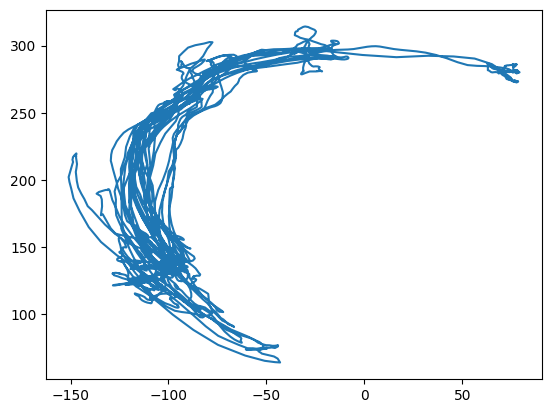

In [89]:
plt.plot(position_df['x'][0][:,2], position_df['y'][0][:,2])

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

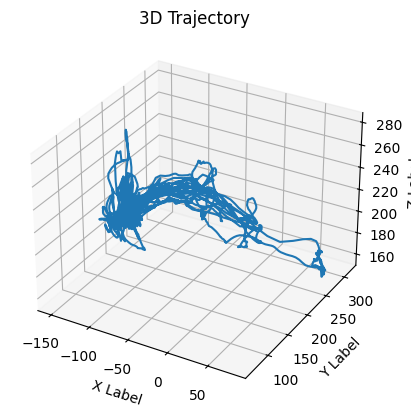

In [91]:
# Example 3D trajectory data
trial = 0
marker = 2

# Create a new figure
fig = plt.figure()

# Add 3D axes to the figure
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D trajectory
ax.plot(position_df['x'][trial][:,marker], position_df['y'][trial][:,marker], position_df['z'][trial][:,marker])

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Trajectory')

# Show the plot
plt.show()


In [92]:
import plotly.graph_objects as go

# Example 3D trajectory data
x = position_df['x'][trial][:,marker]
y = position_df['y'][trial][:,marker]
z = position_df['z'][trial][:,marker]

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=z, z=y, mode='lines', marker=dict(size=4))])

# Update layout
fig.update_layout(scene=dict(
                    xaxis_title='X Label',
                    yaxis_title='Z Label',
                    zaxis_title='Y Label'),
                  title='3D Trajectory')

# Show the plot
fig.show()


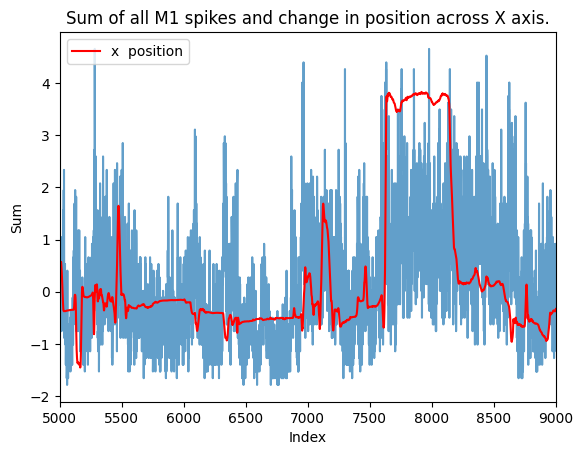

In [93]:
array = trial_df['M1_spikes'][0]

# Sum along the second axis
sums = (np.sum(array, axis=1)-np.mean(np.sum(array, axis=1)))/np.std(np.sum(array, axis=1))

# Plot the sums
plt.plot(sums, alpha = 0.7)
plt.plot((x-np.mean(x))/np.std(x), color = 'red', label = 'x  position')
#plt.plot((y-np.mean(y))/np.std(y), color = 'green', label = 'y position')
#plt.plot((z-np.mean(z))/np.std(z), color = 'k', label = 'z position')
plt.xlabel('Index')
plt.ylabel('Sum')
plt.title('Sum of all M1 spikes and change in position across X axis.')
plt.legend()
plt.xlim([5000,9000])
plt.show()

In [94]:
trial_df.head(3)

,kin_names,joint_names,bin_size,type,tonic_stim_params,reach_stim_params,pull_stim_params,stim_param_names,file_quality,idx_spike_init,...,idx_sent_reach,x,y,z,angles,pressure,M1_spikes,M1_unit_guide,PMd_spikes,PMd_unit_guide
0,"[Shoulder, Elbow Proximal, Elbow Medial, Elbow...","[Shoulder, Elbow, Wrist]",0.01,BASELINE,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[PIN, AMP, PW, FREQ, Length]",0,448,...,-1,"[[-78.177001953125, -67.13090515136719, -94.55...","[[157.4872283935547, 127.37480926513672, 138.9...","[[239.44883728027344, 213.4141082763672, 217.8...","[[131.15547210086754, 63.10203357675376, 129.9...","[-1.1121927073683655, -1.110490070758832, -1.1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[33, 0], [34, 0], [35, 0], [36, 0], [37, 0], ..."
1,"[Shoulder, Elbow Proximal, Elbow Medial, Elbow...","[Shoulder, Elbow, Wrist]",0.01,BASELINE,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[PIN, AMP, PW, FREQ, Length]",1,507,...,-1,"[[-72.200439453125, -67.20014190673828, -94.15...","[[143.6313018798828, 129.1309356689453, 139.59...","[[230.2220001220703, 208.25875854492188, 214.5...","[[125.03894719557405, 91.08175893596952, 132.5...","[-1.0840457012961406, -1.1102463251656425, -1....","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,...","[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[33, 0], [34, 0], [35, 0], [36, 0], [37, 0], ..."
2,"[Shoulder, Elbow Proximal, Elbow Medial, Elbow...","[Shoulder, Elbow, Wrist]",0.01,BC-PULL,"[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[1.0, 900.0, 0.3, 50.0, 600.0]","[PIN, AMP, PW, FREQ, Length]",0,557,...,702,"[[-75.16343688964844, -66.7153549194336, -93.4...","[[165.39056396484375, 127.61315155029297, 137....","[[242.6690673828125, 209.51853942871094, 215.1...","[[129.7355586993369, 54.733106333416096, 120.8...","[-1.1151632783516197, -1.1158892630580866, -1....","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[33, 0], [34, 0], [35, 0], [36, 0], [37, 0], ..."


## Data preprocessing from demo

#### **Combine time-bins into longer ones**

In [95]:
#Every function that returns a trial_data dataframe works on and returns a copy, so the original dataframe is not changed.

In [96]:
df = trial_df

In [97]:
td = combine_time_bins(df, 2)

print(df.head().bin_size)
print()
print(td.head().bin_size)

0    0.01
1    0.01
2    0.01
3    0.01
4    0.01
Name: bin_size, dtype: float64

0    0.02
1    0.02
2    0.02
3    0.02
4    0.02
Name: bin_size, dtype: float64


In [98]:
#Time-varying signals have new time coordinates

In [99]:
print("original: ", df.M1_spikes[0].shape)
print("combined: ", td.M1_spikes[0].shape)

original:  (9222, 64)
combined:  (4611, 64)


#### **Remove low-firing neurons**

In [100]:
td = remove_low_firing_neurons(td, "M1_spikes",  5)
td = remove_low_firing_neurons(td, "PMd_spikes", 5)

print("original: ", df.M1_spikes[0].shape)
print("removed:  ", td.M1_spikes[0].shape)

original:  (9222, 64)
removed:   (4611, 60)


c:\Users\nerea\OneDrive\Documentos\EPFL_MASTER\PDM\Project\PyalData\pyaldata\firing_rates.py:91: UserWarning:

Assuming spikes are actually spikes and dividing by bin size.

c:\Users\nerea\OneDrive\Documentos\EPFL_MASTER\PDM\Project\PyalData\pyaldata\firing_rates.py:91: UserWarning:

Assuming spikes are actually spikes and dividing by bin size.



#### **Transform signals**

In [101]:
td = transform_signal(td, "M1_spikes",  'sqrt')
td = transform_signal(td, "PMd_spikes", 'sqrt')

# alternatively
# td = sqrt_transform_signal(td, "M1_spikes", "sqrt")

td.M1_spikes[0]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.41421356, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ]])

For other transforms see the docstring of `transform_signal` (and the code).

#### **Merge signals from multiple areas**

In [102]:
td = merge_signals(td, ["M1_spikes", "PMd_spikes"], "both_spikes")

print(f"Merging M1 and PMd gives {td.M1_spikes[0].shape[1]} + {td.PMd_spikes[0].shape[1]} = {td.both_spikes[0].shape[1]} neurons")

Merging M1 and PMd gives 60 + 64 = 124 neurons


In [103]:
td['both_spikes'][0].shape

(4611, 124)

#### **Calculate firing rates from spikes**

In [104]:
# works on "_spikes" fields and automatically divides by bin_size
td = add_firing_rates(td, 'smooth')

For other fields use `smooth_signals`

Internally we use `numpy` arrays for generality but working with `xarray` can save you a lot of headaches and thinking.

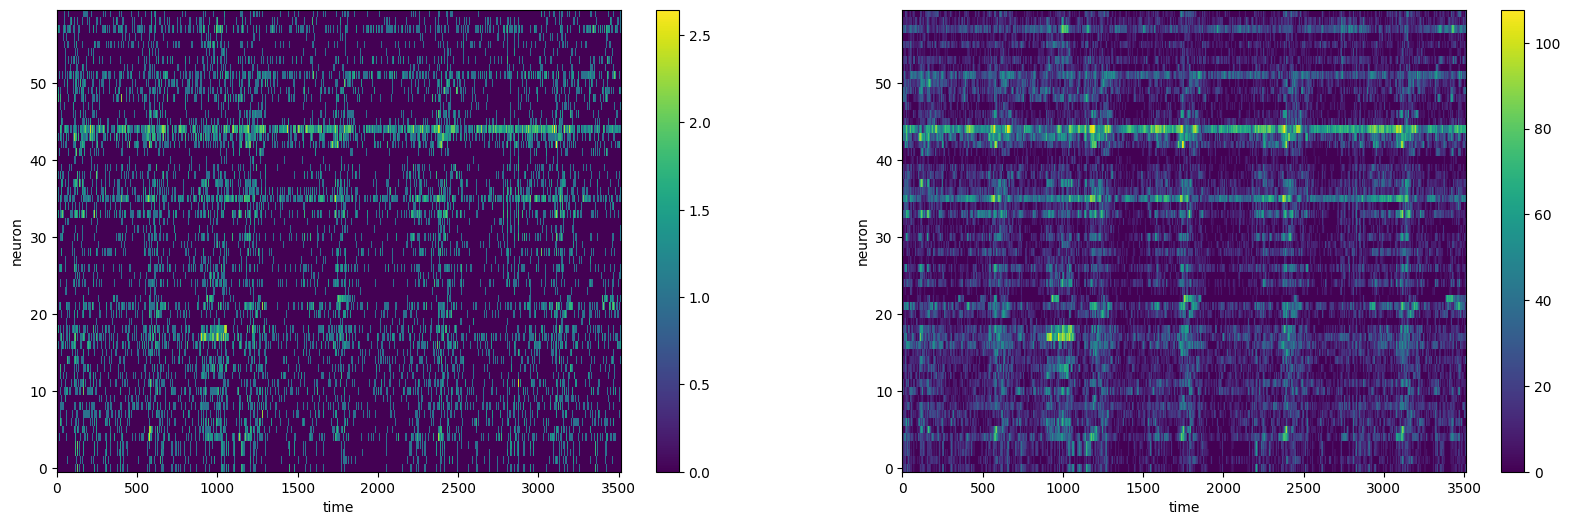

In [105]:
fig, ax = plt.subplots(figsize = (20, 6), ncols = 2)

xr.DataArray(td.M1_spikes[5], dims = ['time', 'neuron']).transpose('neuron', 'time').plot(ax=ax[0])
xr.DataArray(td.M1_rates[5],  dims = ['time', 'neuron']).transpose('neuron', 'time').plot(ax=ax[1])

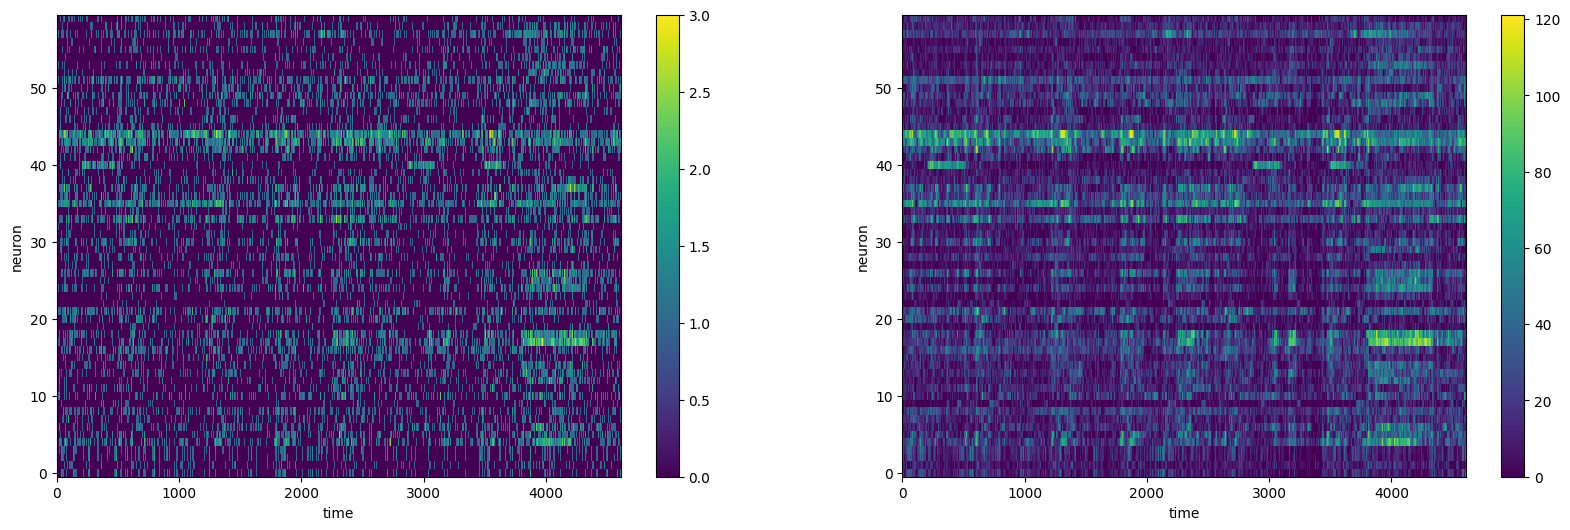

In [106]:
fig, ax = plt.subplots(figsize = (20, 6), ncols = 2)

xr.DataArray(td.M1_spikes[0], dims = ['time', 'neuron']).transpose('neuron', 'time').plot(ax=ax[0])
xr.DataArray(td.M1_rates[0],  dims = ['time', 'neuron']).transpose('neuron', 'time').plot(ax=ax[1])

#### **Keep only the successful trials**

In [107]:
td.columns

Index(['kin_names', 'joint_names', 'bin_size', 'type', 'tonic_stim_params',
       'reach_stim_params', 'pull_stim_params', 'stim_param_names',
       'file_quality', 'idx_spike_init', 'idx_kuka_go', 'idx_reach',
       'idx_decode_pull', 'idx_sent_pull', 'idx_grab', 'idx_end', 'idx_bad',
       'idx_decode_reach', 'idx_sent_reach', 'x', 'y', 'z', 'angles',
       'pressure', 'M1_spikes', 'M1_unit_guide', 'PMd_spikes',
       'PMd_unit_guide', 'both_spikes', 'M1_rates', 'PMd_rates', 'both_rates'],
      dtype='object')

In [108]:
td.file_quality

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: file_quality, dtype: int32

In [109]:
print("all trials:", td.shape[0])

#td = select_trials(td, "result == 'R'") --> previously this, not sure if the new "results" column is actually the "file quality"

td = select_trials(td, "file_quality == 0")

print("successful trials:", td.shape[0])

all trials: 11
successful trials: 10


#### **Restrict time to an interval**

In [139]:
td.idx_spike_init

0    224
1    278
2    221
3    440
4    252
5    277
6    228
7    315
8    265
9    270
Name: idx_spike_init, dtype: int64

In [110]:
#move_td = restrict_to_interval(td, "idx_movement_on", end_point_name=None, rel_start=0, rel_end=40)

move_td = restrict_to_interval(td, "idx_spike_init", end_point_name=None, rel_start=0, rel_end=40) 


print("first trial's length in full:", td.both_rates[0].shape)
print("first trial's length in the new dataframe:", move_td.both_rates[0].shape)

first trial's length in full: (4611, 124)
first trial's length in the new dataframe: (41, 124)


## Dimensionality reduction

#### **Further preprocess by subtracting cross-condition mean**

In [111]:
# aka center per time point
move_td = subtract_cross_condition_mean(move_td)

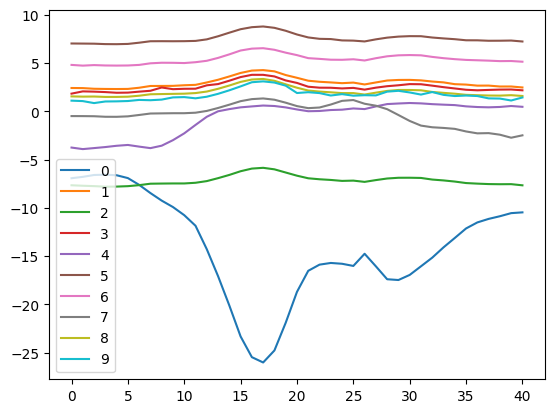

In [112]:
for idx, i in enumerate(move_td['x']):
    x = i[:,2]
    #plt.plot((x-np.mean(x))/np.std(x), label = idx)
    plt.plot(x, label = idx)

plt.legend()
plt.show()

#### **Apply PCA and FA**

In [113]:
from sklearn.decomposition import PCA, FactorAnalysis

In [114]:
pca_dims = 30
fa_dims = 2

move_td = dim_reduce(move_td, PCA(pca_dims), "both_rates", "both_pca")
move_td = dim_reduce(move_td, FactorAnalysis(fa_dims), "both_rates", "both_fa")

In [115]:
print(f"Reduced from {move_td['both_rates'][0].shape[1]} dimensions to {move_td['both_pca'][0].shape[1]}")

Reduced from 124 dimensions to 30


#### **Calculate target ID from target direction**

`Note`Here we don't have a target direction, only the KUKA position (robotic arm). We are going to assume for now that the trials with the same fisrt robotic arm positions are moving in the same direction.

In [116]:
group_df.columns

Index(['num', 'Quality', 'type', 'Tonic', 'Baseline', 'BCReach', 'BCPull',
       'BCReachPull', 'TonicStimParams', 'ReachStimParams', 'PullStimParams',
       'KUKAPos', 'ViconFileName', 'BlackrockFileName', 'TDTFileName',
       'StimParamNames'],
      dtype='object')

In [117]:
move_td.columns

Index(['kin_names', 'joint_names', 'bin_size', 'type', 'tonic_stim_params',
       'reach_stim_params', 'pull_stim_params', 'stim_param_names',
       'file_quality', 'idx_spike_init', 'idx_kuka_go', 'idx_reach',
       'idx_decode_pull', 'idx_sent_pull', 'idx_grab', 'idx_end', 'idx_bad',
       'idx_decode_reach', 'idx_sent_reach', 'x', 'y', 'z', 'angles',
       'pressure', 'M1_spikes', 'M1_unit_guide', 'PMd_spikes',
       'PMd_unit_guide', 'both_spikes', 'M1_rates', 'PMd_rates', 'both_rates',
       'both_pca', 'both_fa'],
      dtype='object')

In [118]:
group_df = group_df.loc[group_df.Quality == 0].reset_index()

In [119]:
group_df.KUKAPos

0    [3, 1, 2, 3, 1, 2]
1    [1, 2, 2, 3, 1, 2]
2       [3, 1, 2, 3, 1]
3    [2, 3, 1, 2, 3, 1]
4       [2, 3, 1, 2, 3]
5       [1, 2, 3, 1, 2]
6                [3, 1]
7    [2, 3, 1, 2, 3, 1]
8    [2, 3, 1, 2, 3, 1]
9       [2, 3, 1, 2, 3]
Name: KUKAPos, dtype: object

In [120]:
move_td['KUKAPos'] = group_df['KUKAPos'].apply(lambda x: x[:2] if isinstance(x, object) else x)

In [121]:
move_td['KUKAPos']

0    [3, 1]
1    [1, 2]
2    [3, 1]
3    [2, 3]
4    [2, 3]
5    [1, 2]
6    [3, 1]
7    [2, 3]
8    [2, 3]
9    [2, 3]
Name: KUKAPos, dtype: object

In [122]:
move_td['KUKAPos'] = move_td['KUKAPos'].astype(str)
group_counts = move_td.groupby('KUKAPos').size()


In [123]:
group_counts

KUKAPos
[1 2]    2
[2 3]    5
[3 1]    3
dtype: int64

In [124]:
# Mapping categories to numerical values
category_mapping = {'[1 2]': 1, '[2 3]': 2, '[3 1]': 1, }

# Creating the ordinal column
move_td['target_id'] = move_td['KUKAPos'].map(category_mapping)

In [125]:
target_type = move_td[['type', 'target_id']]
target_type

,type,target_id
0,BASELINE,1
1,BC-PULL,1
2,BC-PULL,1
3,BC-PULL,2
4,BC-PULL,2
5,BC-PULL,1
6,BASELINE,1
7,BC-PULL,2
8,BC-PULL,2
9,BC-PULL,2


In [126]:
move_td.columns

Index(['kin_names', 'joint_names', 'bin_size', 'type', 'tonic_stim_params',
       'reach_stim_params', 'pull_stim_params', 'stim_param_names',
       'file_quality', 'idx_spike_init', 'idx_kuka_go', 'idx_reach',
       'idx_decode_pull', 'idx_sent_pull', 'idx_grab', 'idx_end', 'idx_bad',
       'idx_decode_reach', 'idx_sent_reach', 'x', 'y', 'z', 'angles',
       'pressure', 'M1_spikes', 'M1_unit_guide', 'PMd_spikes',
       'PMd_unit_guide', 'both_spikes', 'M1_rates', 'PMd_rates', 'both_rates',
       'both_pca', 'both_fa', 'KUKAPos', 'target_id'],
      dtype='object')

In [127]:
#trying to debug the function trial average

trial_data = move_td[['x', 'y', 'z', 'both_spikes', 'both_rates',
       'both_pca', 'both_fa','target_id']]
ref_field = None
condition = 'target_id'

In [128]:
av_pcd_fa = trial_data.groupby('target_id')[['both_pca', 'both_fa', 'x', 'y', 'z']].mean().reset_index()

In [129]:
av_pcd_fa

,target_id,both_pca,both_fa,x,y,z
0,1,"[[9.592527, 13.797541, 8.013309, 3.167585, 3.3...","[[0.20082113242324237, 0.49891295192518215], [...","[[6.920010757446283, 6.0093448638916005, -0.05...","[[-12.338950347900402, -12.300555419921881, 0....","[[-23.435359954833977, -22.886524963378907, -0..."
1,2,"[[-9.592535, -13.797529, -8.01331, -3.1675828,...","[[-0.2008211446647694, -0.4989129690378545], [...","[[-6.920010757446295, -6.009344863891603, 0.05...","[[12.33895034790038, 12.300555419921869, -0.45...","[[23.43535995483399, 22.886524963378907, 0.755..."


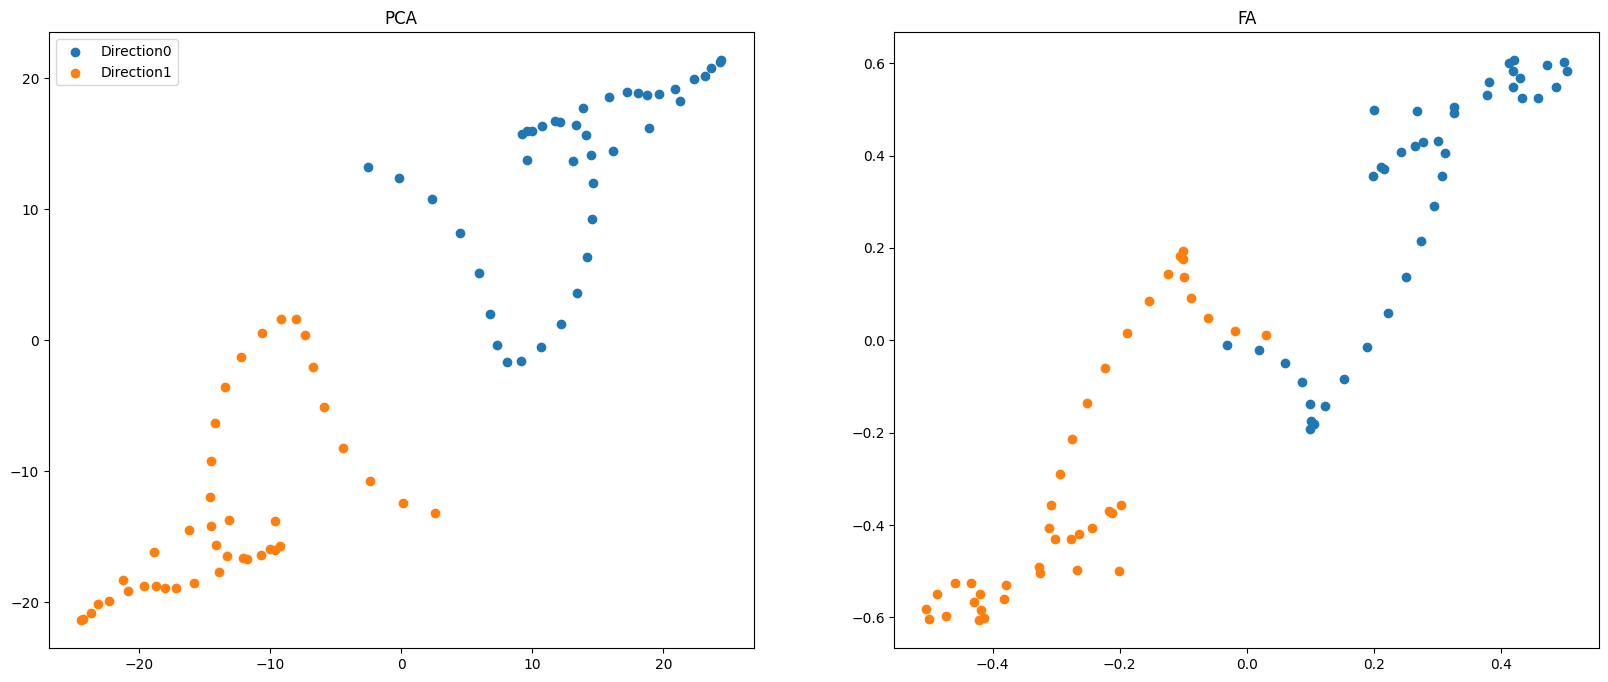

In [130]:
fig, ax = plt.subplots(figsize = (20, 8), ncols = 2)

for idx, dir_pca in enumerate(av_pcd_fa["both_pca"]):
    ax[0].scatter(*dir_pca[:, :2].T, label = 'Direction'+str(idx))
    
for dir_fa in av_pcd_fa["both_fa"]:
    ax[1].scatter(*dir_fa[:, :2].T)
    
ax[0].set_title('PCA')
ax[1].set_title('FA')
ax[0].legend()

`Note`The different direction arrays have the shape: direction_id x timepoints(41) x num_markers (6)

In [131]:
av_pcd_fa['x'][0].shape

(41, 6)

Text(0.5, 1.0, 'Z trajestory for marker 3')

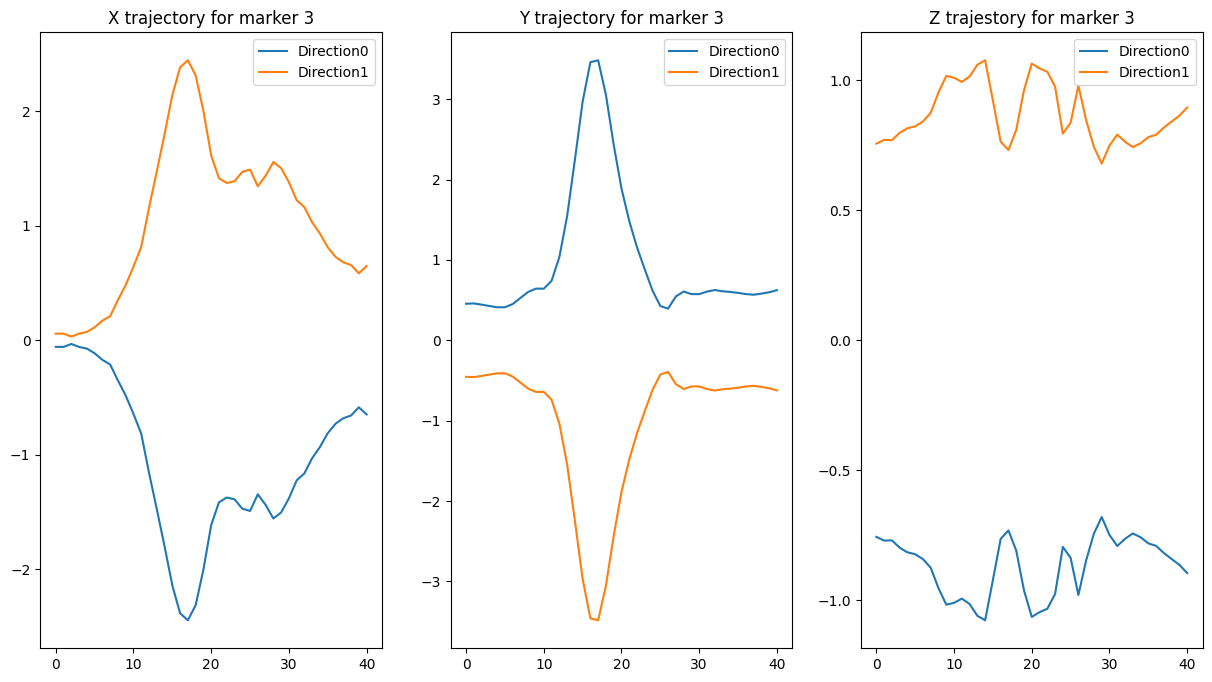

In [132]:
fig, ax = plt.subplots(figsize = (15, 8), ncols = 3)


for idx, x in enumerate(av_pcd_fa['x']):
    ax[0].plot(av_pcd_fa['x'][idx][:,2], label = 'Direction'+str(idx))


for idx, x in enumerate(av_pcd_fa['y']):
    ax[1].plot(av_pcd_fa['y'][idx][:,2], label = 'Direction'+str(idx))


for idx, x in enumerate(av_pcd_fa['z']):
    ax[2].plot(av_pcd_fa['z'][idx][:,2], label = 'Direction'+str(idx))

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_title('X trajectory for marker 3')
ax[1].set_title('Y trajectory for marker 3')
ax[2].set_title('Z trajestory for marker 3')
    

Now instead of directions we will try to separate the **rest-reach-grasp-pull**

In [133]:
move_td.columns

Index(['kin_names', 'joint_names', 'bin_size', 'type', 'tonic_stim_params',
       'reach_stim_params', 'pull_stim_params', 'stim_param_names',
       'file_quality', 'idx_spike_init', 'idx_kuka_go', 'idx_reach',
       'idx_decode_pull', 'idx_sent_pull', 'idx_grab', 'idx_end', 'idx_bad',
       'idx_decode_reach', 'idx_sent_reach', 'x', 'y', 'z', 'angles',
       'pressure', 'M1_spikes', 'M1_unit_guide', 'PMd_spikes',
       'PMd_unit_guide', 'both_spikes', 'M1_rates', 'PMd_rates', 'both_rates',
       'both_pca', 'both_fa', 'KUKAPos', 'target_id'],
      dtype='object')

In [134]:
move_td.idx_sent_reach

0                NaN
1                NaN
2                NaN
3         [nan, nan]
4                NaN
5    [nan, nan, nan]
6                NaN
7                NaN
8                NaN
9         [nan, nan]
Name: idx_sent_reach, dtype: object

# TO DO : PLOT THE DIFFERENT X,Y,Z TRAJECTORIES WITH THE INDICES TO SEPARATE THE 4 PHASES OF THE MOVEMENT

#### **Decode hand positions from neural data using linear regression**

In [135]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import cross_val_score, KFold

In [136]:
for input_field in ["M1_rates", "PMd_rates", "both_rates", "both_pca"]:
    X = concat_trials(move_td, input_field)
    y = concat_trials(move_td, "x")

    cv_scores = cross_val_score(LinearRegression(), X, y, cv = KFold(5, shuffle=True))
    
    print(f"{input_field}:\t{cv_scores.mean()}")

M1_rates:	0.8573113352459621
PMd_rates:	0.8364184221049824
both_rates:	0.9476979313978392
both_pca:	0.8011573248169018


In [137]:
for input_field in ["M1_rates", "PMd_rates", "both_rates", "both_pca"]:
    X = concat_trials(move_td, input_field)
    y = concat_trials(move_td, "y")

    cv_scores = cross_val_score(LinearRegression(), X, y, cv = KFold(5, shuffle=True))
    
    print(f"{input_field}:\t{cv_scores.mean()}")

M1_rates:	0.8486648849812252
PMd_rates:	0.8051689664631297
both_rates:	0.9587953133995942
both_pca:	0.6853481823299091


In [138]:
for input_field in ["M1_rates", "PMd_rates", "both_rates", "both_pca"]:
    X = concat_trials(move_td, input_field)
    y = concat_trials(move_td, "z")

    cv_scores = cross_val_score(LinearRegression(), X, y, cv = KFold(5, shuffle=True))
    
    print(f"{input_field}:\t{cv_scores.mean()}")

M1_rates:	0.8184900023946955
PMd_rates:	0.7968568850254747
both_rates:	0.9201538544769636
both_pca:	0.6937737451252831
